## Rendimiento Messi 22/23
El ganador del balón de oro este año ha levantado mucha polémica, pero que dicen los datos sobre su rendimiento en la cancha.

In [ ]:
import pandas as pd

url = 'https://fbref.com/en/players/d70ce98e/matchlogs/2022-2023/Lionel-Messi-Match-Logs'
tables = pd.read_html(url)
df = tables[0]
df.columns = df.columns.droplevel(0)
relevant_columns = ['Comp', 'Squad', 'Result', 'Min', 'Gls', 'Ast', 'Sh', 'SoT','PrgP','Succ']
Messi = df[relevant_columns].dropna()
Messi.head()


,Comp,Squad,Result,Min,Gls,Ast,Sh,SoT,PrgP,Succ
1,Ligue 1,Paris S-G,W 5–0,90.0,2.0,1.0,6.0,4.0,14.0,6.0
2,Ligue 1,Paris S-G,W 5–2,90.0,0.0,0.0,5.0,3.0,14.0,4.0
3,Ligue 1,Paris S-G,W 7–1,90.0,1.0,1.0,2.0,2.0,12.0,2.0
4,Ligue 1,Paris S-G,D 1–1,86.0,0.0,0.0,2.0,0.0,9.0,4.0
5,Ligue 1,Paris S-G,W 3–0,82.0,0.0,2.0,7.0,4.0,10.0,3.0


Messi siempre ha tenido fama de playmaker por lo que creo que los pases progresivos son su fuerte, por eso diría que promedia 10 pases progresivos por partido

In [ ]:
#H0: meanWeight =10PrgP (Ok)
#H1: meanWeight !=10PrgP (X)

import pingouin as pg

test_result = pg.ttest(Messi['PrgP'],12, alternative='two-sided')
print(test_result)

               T  dof alternative     p-val          CI95%   cohen-d  \
T-test -5.576521   45   two-sided  0.000001  [8.06, 10.15]  0.822213   

             BF10     power  
T-test  1.281e+04  0.999762  


Creo que Messi ha sido decisivo en los partidos que ha jugado, por lo que creo que cuando marca goles es más probable que se gane el partido

In [170]:
Goles_Messi = Messi[Messi['Result'].str.startswith('W')]['Gls']
No_goles_Messi = Messi[~Messi['Result'].str.startswith('W')]['Gls']
print(Goles_Messi.mean())
print(No_goles_Messi.mean())

0.65625
0.42857142857142855


In [171]:
#Hago mi test de hipotesis
# Ho: Goles_Messi > No_goles_Messi (Ok)
# H1: No_goles_Messi = Goles_Messi (X)
test1_result = pg.ttest(Goles_Messi,No_goles_Messi, alternative='greater')
print(test1_result)

               T       dof alternative     p-val         CI95%   cohen-d  \
T-test  1.122557  23.32101     greater  0.136525  [-0.12, inf]  0.370149   

         BF10     power  
T-test  1.024  0.305915  


¿Las comparaciones son odiosas, pero que tan bueno fue su rendimiento en el mundial, sabemos que Messi es uno de los mejores creadores de juego por lo que destaca entre otras cosas por sus asistencias en que competición destaco más esta faceta?

In [173]:
print(Messi.groupby('Comp')['Ast'].mean)

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x785f125fa830>>


In [174]:
#Ho: Las asistencias en cualquir competicion son las mismas
#H1: Las asistencias en cualquir competicion no son las mismas
Asist_comp = pg.anova(data=Messi, dv='Ast',between='Comp')
print(Asist_comp)

  Source  ddof1  ddof2         F     p-unc       np2
0   Comp      2     43  0.071667  0.930952  0.003322


In [175]:
# Hacemos ttest entre todas las comvinaciones de categoria posibles
Asist_comp_comparacion = pg.pairwise_tests(data=Messi,dv='Ast',between='Comp')
print(Asist_comp_comparacion)

  Contrast             A          B  Paired  Parametric         T        dof  \
0     Comp  Champions Lg    Ligue 1   False        True  0.220892   8.334507   
1     Comp  Champions Lg  World Cup   False        True  0.397360  12.000000   
2     Comp       Ligue 1  World Cup   False        True  0.299325  11.336235   

  alternative     p-unc   BF10    hedges  
0   two-sided  0.830492  0.386  0.095858  
1   two-sided  0.698079   0.47  0.198840  
2   two-sided  0.770109  0.391  0.101124  


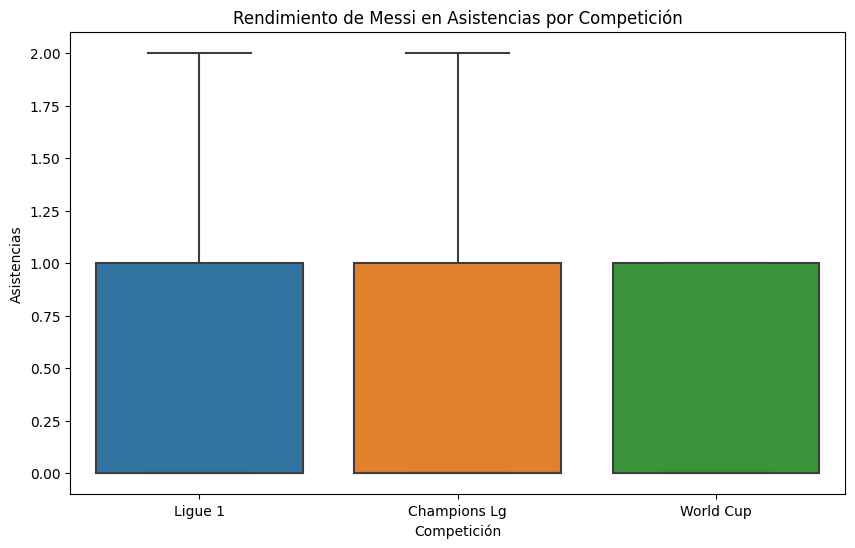

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot comparando asistencias en todas las competiciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='Comp', y='Ast', data= Messi)
plt.title('Rendimiento de Messi en Asistencias por Competición')
plt.xlabel('Competición')
plt.ylabel('Asistencias')
plt.show()
